In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
from astropy.table import Table
import numpy as np
from math import log
import matplotlib.pyplot as plt

In [15]:
#deltaTau/pi
DeltaTau = [1, 1,
           1, 1, 1, 1,
           1, 1, 
           4, 16,
           1/4, 1/16]

K = [ 1/4, 1/16,
    1, 1, 1, 1,
    4, 16, 
    1, 1,
    1, 1]

etaM = [ 0.01, 0.01,
       0.000625, 0.0025, 0.01, 0.04,
       0.01, 0.01, 
       0.01, 0.01,
       0.01, 0.01]

F1 = [0.00668,0.00741,
     0.00047, 0.00176, 0.00704, 0.02782,
     0.00714, 0.00659,
     0.00167, 0.00040,
     0.02634, 0.09168]

G1 = [0.00636, 0.00636,
     0.00038, 0.00160, 0.00636, 0.02438,
     0.00631, 0.00691,
     0.00627, 0.00623,
     0.00638, 0.00626]

F2 = [0.00640, 0.00638,  
     0.00039, 0.00163, 0.00626, 0.02492,
     0.00611, 0.00595,
     0.00647, 0.00639,
     0.00644, 0.00653]

A = [0.05084,  0.05923,
    0.00009, 0.00257, 0.02059, 0.10454,
    0.02353, 0.01197,
    0.01322, 0.00044,
    0.01618, 0.00054]

In [16]:
def funlog(list):
    loglist = []
    for y in list:
        loglist.append(log(y,10))
    return loglist

logF2 = funlog(F2)
logA = funlog(A)

t = Table([[0,1,2,3,4,5,6, 7, 8, 9, 10, 11], etaM,K,DeltaTau,F1,G1,F2,A], 
          names=('$Run$', '$\u03B7 \u039C ^{2}$', '$\u039A$', '$\u0394 \u03A4 / \pi$', r'$ \langle F_{1}^{2} \rangle ^{1/2}$',  r'$\langle G_{1}^{2} \rangle ^{1/2}$', r'$\langle F_{2}^{2} \rangle ^{1/2}$', r'$\langle A^{2} \rangle$'))

t

$Run$,$η Μ ^{2}$,$Κ$,$Δ Τ / \pi$,$ \langle F_{1}^{2} \rangle ^{1/2}$,$\langle G_{1}^{2} \rangle ^{1/2}$,$\langle F_{2}^{2} \rangle ^{1/2}$,$\langle A^{2} \rangle$
int64,float64,float64,float64,float64,float64,float64,float64
0,0.01,0.25,1.0,0.00668,0.00636,0.0064,0.05084
1,0.01,0.0625,1.0,0.00741,0.00636,0.00638,0.05923
2,0.000625,1.0,1.0,0.00047,0.00038,0.00039,9e-05
3,0.0025,1.0,1.0,0.00176,0.0016,0.00163,0.00257
4,0.01,1.0,1.0,0.00704,0.00636,0.00626,0.02059
5,0.04,1.0,1.0,0.02782,0.02438,0.02492,0.10454
6,0.01,4.0,1.0,0.00714,0.00631,0.00611,0.02353
7,0.01,16.0,1.0,0.00659,0.00691,0.00595,0.01197
8,0.01,1.0,4.0,0.00167,0.00627,0.00647,0.01322


In [17]:
fiducial_second = []
for i in range(len(K)):
    if K[i] == 1 and DeltaTau[i] == 1:
        fiducial_second.append(i)
        
fiducial_first = []
for i in range(len(etaM)):
    if etaM[i] == 0.01 and DeltaTau[i] == 1:
        fiducial_first.append(i)
        
fiducial_third = []
for i in range(len(DeltaTau)):
    if etaM[i] == 0.01 and K[i] == 1:
        fiducial_third.append(i)
        
first_K = []
first_A = []
first_F2 = []
for i in fiducial_first:
    first_K.append(K[i])
    first_A.append(logA[i])
    first_F2.append(logF2[i])
    
second_etaM = []
second_A = []
second_F2 = []
for i in fiducial_second:
    second_etaM.append(etaM[i])
    second_A.append(logA[i])
    second_F2.append(logF2[i])
    
third_deltaT = []
third_A = []
third_F2 = []
for i in fiducial_third:
    third_deltaT.append(DeltaTau[i])
    third_A.append(logA[i])
    third_F2.append(logF2[i])


first_K = funlog(first_K)
second_etaM = funlog(second_etaM)
third_deltaT = funlog(third_deltaT)

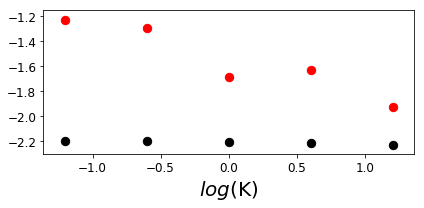

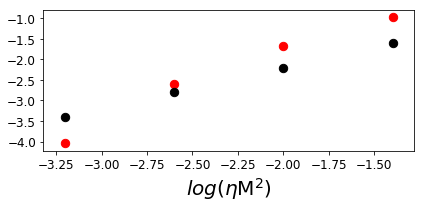

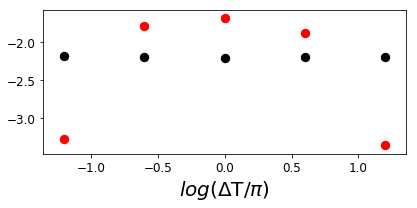

In [19]:
axis_font = {'size':'20'}

plt.figure(figsize=(6,3))
plt.scatter(first_K, first_A, s = 70, c = 'r', label = r'$log( \langle A^{2} \rangle )$')
plt.scatter(first_K, first_F2, s = 70, c = 'k', label = r'$log( \langle F_{2}^{2} \rangle ^{1/2} )$')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$log(\u039A)$', **axis_font)
plt.tight_layout()
plt.savefig("presentation1.png")
plt.show()


plt.figure(figsize=(6,3))
plt.scatter(second_etaM, second_A, s = 70, c = 'r')
plt.scatter(second_etaM, second_F2, s = 70, c = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$log(\u03B7 \u039C ^{2})$', **axis_font)
plt.tight_layout()
plt.savefig("presentation2.png")
plt.show()

plt.figure(figsize=(6,3))
plt.scatter(third_deltaT, third_A, s = 70, c = 'r')
plt.scatter(third_deltaT, third_F2, s = 70, c = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$log(\u0394 \u03A4 / \pi)$', **axis_font)
plt.tight_layout()
plt.savefig("presentation.png")
plt.show()